In [1]:
! pip install numpy
! pip install matplotlib
! pip install scipy

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import scipy.special

np.set_printoptions(suppress=True)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Mobile Radio Channels

## Exercise 1: Mobile Radio Channel

Four reflected radio signals are received by a car driving with a velocity of $v=100 km/h$ as shown in the figure below. The relative delays of the signals can be neglected. The reflection coefficients $r_0,r_1,r_2,r_3$ are to be taken from the figure below. The carrier frequency is $1 GHz$.

Speed of light $c_0 \approx 3 \cdot 10^8 m/s$

### a) Calculate the Doppler shift of the four signals.

In [2]:
fc = 1* 10**9
v_kmh = 100
c0 = const.c

v_ms = 100/3.6

alpha = np.array([0, 90, 30, 210])

alpha_rad = np.deg2rad(alpha)

fd = fc*v_ms/c0*np.cos(alpha_rad)

In [3]:
print(f"The doppler frequencies are : {fd}Hz");

The doppler frequencies are : [ 92.65669311   0.          80.24305006 -80.24305006]Hz


### b) Sketch the complete spectrum of the received signal in case of a non-modulated signal.

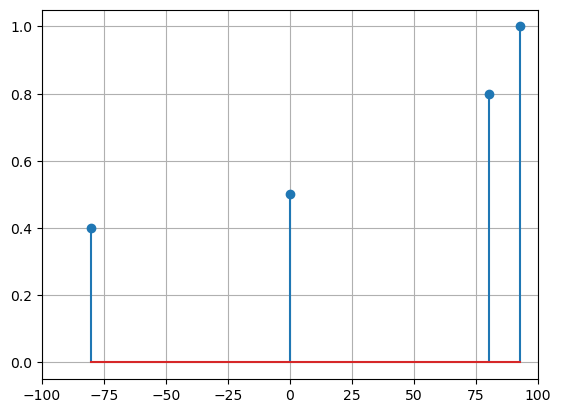

In [4]:
r = np.array([1,0.5,0.8,0.4])

plt.stem(fd, r)
plt.xlim(-100,100)
plt.grid(True)
plt.show()

## Excersice 2: Mobile Radio Channel

Three reflected radio signals are received by a car driving with a velocity of $v=100 km/h$, as shown in the figure below. The relative delay of the signals can be neglected at first and the carrier frequency is $f_0=2$ GHz. The reflection coefficients $r_0,r_1,r_2$ are given in the figure below.

Speed of light $c_0 \approx 3 \cdot 10^8 m/s$

### a) Calculate the Doppler frequencies $f_{D,\nu}$ of the three signals.

In [5]:
fc = 2*10**9
c0 = const.c
v_kmh = 100

v_ms = v_kmh/3.6

alpha = np.array([0,90,215])
alpha_rad = np.deg2rad(alpha)

fd = fc*v_ms/c0*np.cos(alpha_rad)


In [18]:
print(f"The doppler frequencies are : {fd}Hz")

The doppler frequencies are : [138.98503967  98.27726403]Hz


### b) Sketch the complete spectrum of the received signal in case of an unmodulated signal.

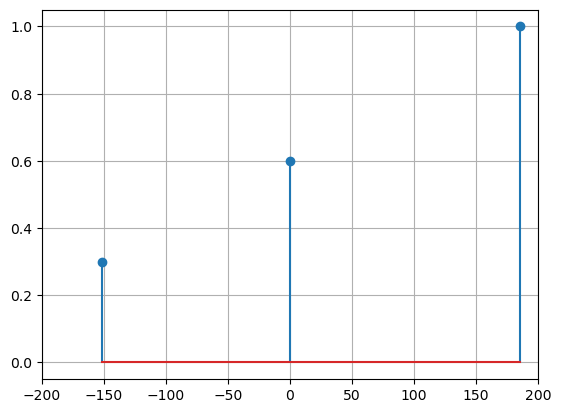

In [7]:
r = np.array([1,0.6,0.3])


plt.stem(fd, r)
plt.xlim(-200,200)
plt.grid(True)

### c) Sketch the impulse response $h_K\!\left(t\right)$ of the multipath channel.
Now, the velocity of the car is $v=0$ km/h, so that no Doppler effect occurs. The reflected path components with reflection coefficients $r_1$ and $r_2$ have relative delays $\tau_1,\tau_2$, with $\tau_2>\tau_1$, with respect to the direct path ($\tau_0 = 0$), with coefficient $r_0$.

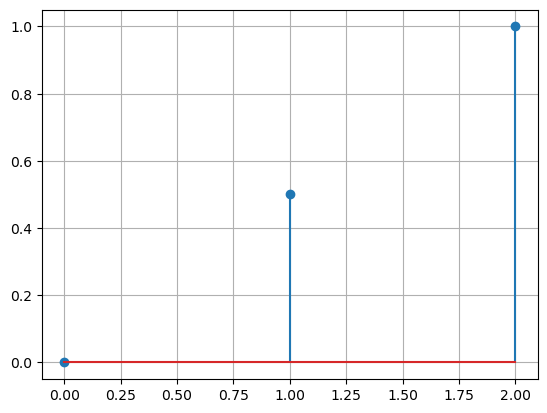

In [8]:
tau = np.array([0,1,2])
r = np.array([0,0.5,1])

plt.stem(tau, r)
plt.grid(True)

### d) Give the expression for the impulse response and calculate the channel transfer function $H_K\!\left(j\omega\right)$ of the multipath channel.

$$h_K\!\left(t\right)=\sum\limits_{\nu=0}^{n}\rho_\nu\cdot\delta\left(t-\tau_\nu\right)=\delta\left(t\right)+r_1\cdot\delta\left(t-\tau_1\right)+r_2\cdot\delta\left(t-\tau_2\right)$$
$$H_K\!\left(j\omega\right)=\sum\limits_{\nu=0}^{n}\rho_\nu\cdot \mathrm{exp}\left(-j\omega \tau_\nu\right)=1+r_1\cdot\mathrm{exp}\left(-j2\pi f \tau_1\right)+r_2\cdot\mathrm{exp}\left(-j2\pi f \tau_2\right)$$

### e) At the receiver the received signal is filtered with an ideal bandpass  $H_\text{BP}\!\left(j\omega\right)$ with center frequency $f_0$ and bandwidth $B$. Calculate the equivalent lowpass description $H_\text{TP}\!\left(j\omega\right)$ of the overall transfer function $H_\text{TP}\!\left(j\omega\right)=H_K\!\left(j\omega\right)\cdot H_\text{BP}\!\left(j\omega\right)$.

$H_\text{TP}(j\omega)=H_K(j(\omega+\omega_0)),\,|f|<B/2$ <br>
$$   H_\text{TP}\!\left(j\omega\right)=
   \begin{cases}
    \left[1+ r_1\cdot\mathrm{e}^{-j(\omega+\omega_0)\tau_1}+ r_2\cdot\mathrm{e}^{-j(\omega+\omega_0)\tau_2}\right]& \quad \text{for}\quad -\frac{B}{2}\leq f\leq\frac{B}{2}\\
    0 & \quad \text{otherwise}
   \end{cases}

### f)  Illustrate the impact of the echos on the absolute transfer function $\left|H_\text{TP}\!\left(j\omega\right)\right|$. 
(Short explanation please!).

L = 1 $|H_{LP}| = $ const. <br>
L > 1 $|H_{LP}| = $ not const. channel is frequency selective

## Exercise 3: Mobile Radio Channel 
A mobile radio channel scenario is given in the figure below.

### a) Determine the impulse response of the equivalent low-pass channel for a stationary vehicle. The carrier frequency is $f_0=1$~GHz.
Speed of light $c_0=3\cdot10^8$ m/s

$$a = 45$$
$$\ell_0 = 600$$
$$\ell_1 = 1400$$
$$\rho_0 = 1$$
$$\rho_1 = 0.5$$

Delays: $t_v = \dfrac{\ell_v}{c_0}$
Relative Delays: $\tau_v = t_v - t_0$

$\rightarrow \tau_0 = 0$ <br>
$\tau_1 = t_1 - t_0 =\dfrac{\ell_1-\ell_0}{c_0}$

In [9]:
f0 = 1*10**9
c0 = const.c

r0 = 1
r1 = 0.5
l0 = 600
l1 = 1400
alpha = np.array([0,45])
alpha_rad = np.deg2rad(alpha)

tau1 = (l1-l0)/c0


In [19]:
print(f" tau_1 is {tau1}")

 tau_1 is 2.6685127615852163e-06


Normilized LP impulse repsonse:
$$ h_{LP}(t) = \sum_v r_V\delta(t-\tau_v)$$

$$ r_v = \dfrac{\rho_v}{\rho_0}e^{(-j\omega_o\tau_v)}$$

$\rightarrow r_0 = 1$ per definition
$$ r_1 = 0.5 \cdot e^{(-j\omega_o\tau_1)} $$

$$ h_{LP}(t) = 1\cdot \delta(t) + 0.5 \cdot \delta(t-\tau_1) \cdot e^{(-j\omega_o\tau_1)} $$



### b) Determine the channel transfer function of the equivalent low-pass channel. Determine the minimum and the maximum of its absolute value and the corresponding frequencies. Sketch the absolute value of the transfer function.

Written on the board

### c) Now the vehicle has a speed of $v=150$ km/h. Give an expression for the received equivalent low-pass signal $r(t)$ for an arbitrary transmitted low-pass signal $s(t)$.

In [11]:
v_kmh= 150
v_ms = v_kmh/3.6

fd = f0 * v_ms/c0*np.cos(alpha_rad)


In [12]:
print(f"The doppler frequencies are : {fd}Hz")

The doppler frequencies are : [138.98503967  98.27726403]Hz


$$r(t)=s(t-\tau_0)\cdot\mathrm{exp}\left(-j2\pi\,f_{Dmax}\cdot \tau_0\right)+0.5 \cdot s(t-\tau_1)\cdot\mathrm{exp}\left(-j2\pi\,\left(0.\overline{6} + \frac{1}{\sqrt{2}}\cdot f_{Dmax}\cdot \tau_1\right)\right)$$

## Excerise 4: Mobile Radio Channel BER

 Consider a BPSK data transmission, with $d(i)\in\{-1,1\}$, over a flat channel with the time-variant channel coefficient $h(k)$
 $$y(k)=h(k)\cdot d(k)+n(k)\,.$$
 The symbol duration is $T_\text{Baud}=50\text{ns}$, and the signal-to-noise power ratio is $\frac{E_b}{N_0}=\frac{\text E\{|d(k)|^2\}}{\text E\{|n(k)|^2\}}=7\text{dB}$. The channel $h(k)$ can assume three states, which are characterized by the channel coefficients
 $$h_1=0.5\cdot \exp(j\pi/4),\qquad h_2=0.8\cdot\exp(j\pi/6),\qquad h_3=0.1+j0.2\,.$$
 Furthermore, the states are characterized by an average probability of occurence $P_\ell=\text{Pr}\{h(k)=h_\ell\}$ with $P_1+P_2+P_3=1$.

 Assume perfect channel state information and coherent detection at the receiver.\\
 Use the graphic below to solve the following problems.

### a) Determine the average bit error probability for uniformly distributed states,$P_1=P_2=P_3$.

In [13]:
T_baud = 50 *10**-9
Eb_N0_db = 7

Eb_N0_lin = 10**(Eb_N0_db/10)

h1 = 0.5*np.exp(1j* np.pi/4)
h2 = 0.8*np.exp(1j* np.pi/6)
h3 = 0.1+0.2j

h = np.array([h1,h2, h3])
print("Absoulte H: ", abs(h))

pb = 0.5*scipy.special.erfc(np.sqrt(abs(h)**2*Eb_N0_lin))
print("Bit error rate: ", pb)

p = 1/3*(pb[0]+pb[1]+pb[2])
p = np.mean(pb)
print("Average bit error rate: ", p)


Absoulte H:  [0.5       0.8       0.2236068]
Bit error rate:  [0.05670903 0.00565739 0.23948946]
Average bit error rate:  0.10061862914508328


### b) Determine the average bit error probability for the following probabilities of occurence:
  $$P_1=0.6,\qquad P_2=0.3, \qquad P_3=0.1.$$

In [14]:
p1 = 0.6
p2 = 0.3
p3 = 0.1

p = p1*pb[0]+p2*pb[1]+p3*pb[2]
print("Average bit error rate: ", p)

Average bit error rate:  0.059671583935262604


### c) Asumme perfect channel state information at the transmitter. What is the resulting bit error probability, if the transmitter transmits only during the strongest channel coefficient?

In [15]:
result = np.where(abs(h) == max(abs(h)))[0]

print("The stongest channel: h",result+1 )
print("Bit error probability: ", pb[result])

The stongest channel: h [2]
Bit error probability:  [0.00565739]


### d) Determie the average bit rate for part c).

In [16]:
M = 2 #BPSK

R = 1*np.log2(M)/T_baud
print("Data Rate: ", R)


Data Rate:  20000000.0


When Channel is used for a 1/3 of the time:

In [17]:
R_bar = 1/3 * R
print("Ave Data Rate :", R_bar)

Ave Data Rate : 6666666.666666666


## Exercise 5: Diversity
Will be calculated on the board

## Exercise 6: Diversity
Will be calculated on the board